In [3]:
from sklearn import datasets
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import HTML
from matplotlib import animation
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import numpy as np

In [4]:
boston = datasets.load_boston()

In [5]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [7]:
df = pd.DataFrame(data = boston.data)

In [8]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [9]:
df.columns = boston.feature_names

In [10]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [11]:
df['Target'] = boston.target

In [12]:
df = df.rename(columns = {'Target':'Price'})

In [13]:
corr = df.corr()

In [14]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [15]:
corr['Price'].sort_values(ascending = False)

Price      1.000000
RM         0.695360
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
AGE       -0.376955
RAD       -0.381626
CRIM      -0.388305
NOX       -0.427321
TAX       -0.468536
INDUS     -0.483725
PTRATIO   -0.507787
LSTAT     -0.737663
Name: Price, dtype: float64

In [16]:
corr_values = corr['Price'].abs().sort_values(ascending = False)
corr_values

Price      1.000000
LSTAT      0.737663
RM         0.695360
PTRATIO    0.507787
INDUS      0.483725
TAX        0.468536
NOX        0.427321
CRIM       0.388305
RAD        0.381626
AGE        0.376955
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
Name: Price, dtype: float64

In [17]:
from sklearn import preprocessing

In [18]:
x_RM = preprocessing.scale(df['RM'])
x_LSTAT = preprocessing.scale(df['LSTAT'])
y = preprocessing.scale(df['Price'])

In [19]:
from pylab import rcParams
rcParams['figure.figsize'] = 12,8

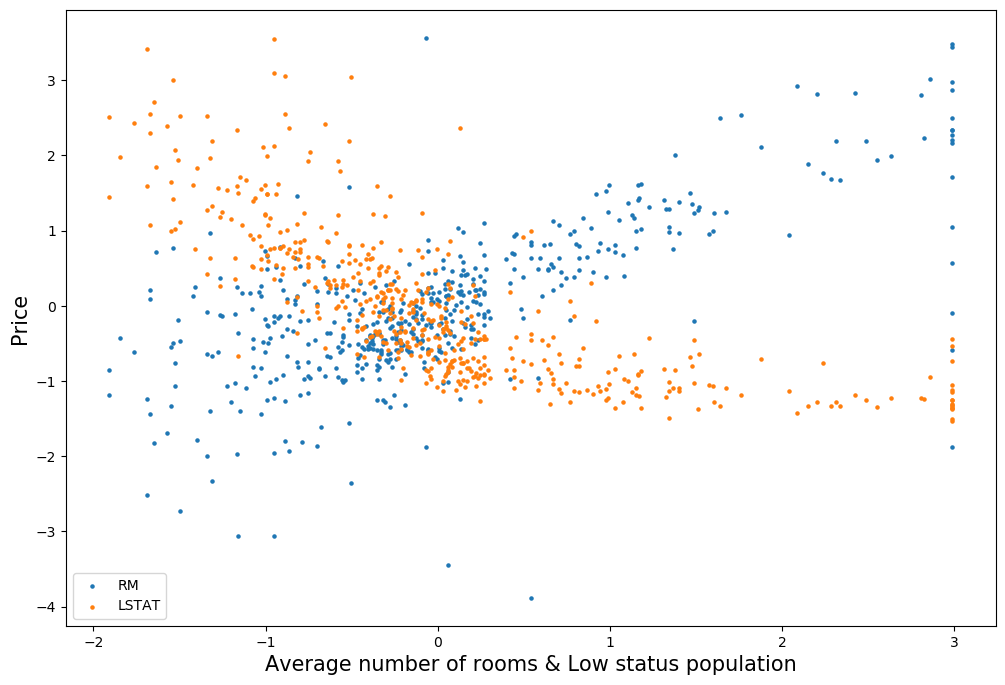

In [22]:
plt.scatter(y, x_RM, s=5, label = 'RM')
plt.scatter(y, x_LSTAT, s=5, label = 'LSTAT')
plt.legend(fontsize=15)
plt.xlabel('Average number of rooms & Low status population', fontsize=15)
plt.ylabel('Price', fontsize=15)
plt.legend()
plt.show()


In [23]:
x = np.c_[np.ones(x_RM.shape[0]),x_RM, x_LSTAT]

In [25]:
# Parameters required for Gradient Descent
alpha = 0.0001   #learning rate
m = y.size  #no. of samples
np.random.seed(10)
theta = np.random.rand(3)  #initializing theta with some random values


In [26]:
def gradient_descent(x, y, m, theta, alpha):
    cost_list = []   #to record all cost values to this list
    theta_list = []  #to record all theta_0 and theta_1 values to this list 
    prediction_list = []
    run = True
    cost_list.append(1e10)    #we append some large value to the cost list
    i=0
    while run:
        prediction = np.dot(x, theta)   #predicted y values theta_0*x0+theta_1*x1
        prediction_list.append(prediction)
        error = prediction - y
        cost = 1/(2*m) * np.dot(error.T, error)   #  (1/2m)*sum[(error)^2]
        cost_list.append(cost)
        theta = theta - (alpha * (1/m) * np.dot(x.T, error))   # alpha * (1/m) * sum[error*x]
        theta_list.append(theta)
        if cost_list[i]-cost_list[i+1] < 1e-9:   #checking if the change in cost function is less than 10^(-9)
            run = False

        i+=1
    cost_list.pop(0)   # Remove the large number we added in the begining 
    return prediction_list, cost_list, theta_list

In [27]:
prediction_list, cost_list, theta_list = gradient_descent(x, y, m, theta, alpha)
theta = theta_list[-1]

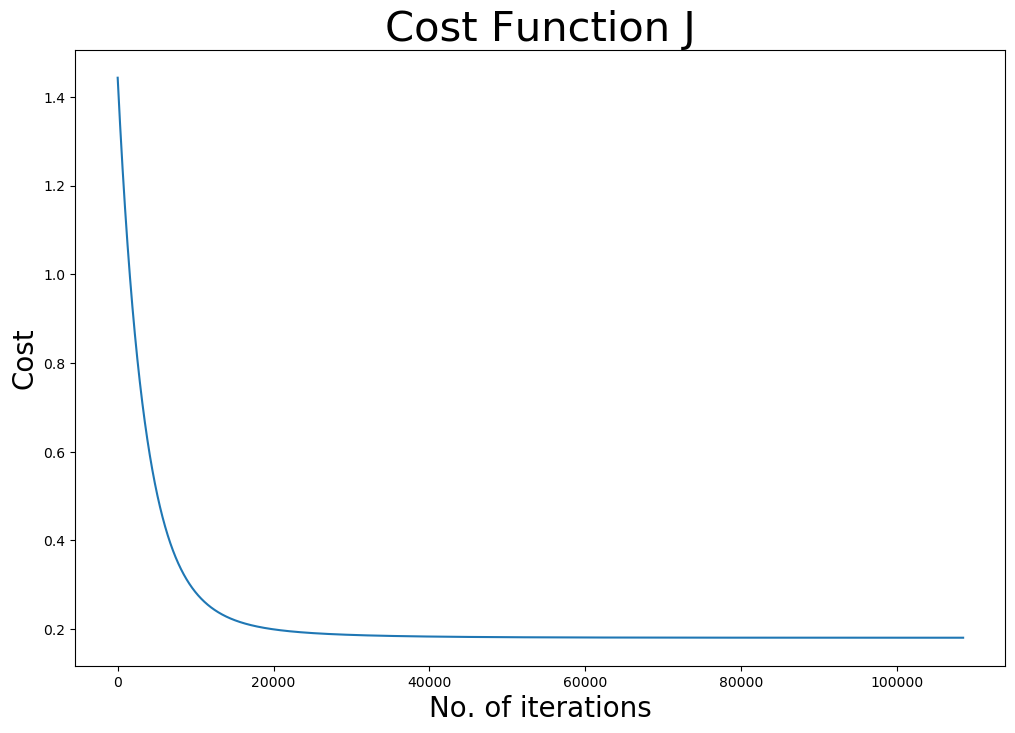

In [28]:
plt.title('Cost Function J', size = 30)
plt.xlabel('No. of iterations', size=20)
plt.ylabel('Cost', size=20)
plt.plot(cost_list)
plt.show()

In [29]:
yp = theta[0] +theta[1]*x[:,1] + theta[2]*x[:,2]

In [30]:
MSE_equ = ((yp-y)**2).mean()  #Using yp from equation of hyperplane
MSE_GD = ((prediction_list[-1]-y)**2).mean()  #From Gradient Descent


print('Mean Square Error using equation of hyperplane : {}'.format(round(MSE_equ,3)))
print('Mean Square Error from Gradient Descent prediction : {}'.format(round(MSE_GD,3)))

Mean Square Error using equation of hyperplane : 0.361
Mean Square Error from Gradient Descent prediction : 0.361


In [32]:
from sklearn.linear_model import LinearRegression

In [33]:
ys = df['Price']
xs = np.c_[df['RM'],df['LSTAT']]

In [34]:
ys.shape, xs.shape

((506,), (506, 2))

In [36]:
xs = preprocessing.scale(xs)
ys = preprocessing.scale(ys)

In [37]:
lm = LinearRegression()

#Fitting the model
lm = lm.fit(xs,ys)

In [38]:
pred = lm.predict(xs)

In [39]:
pred.shape

(506,)

In [40]:
intercept = lm.intercept_
Theta_0 = lm.coef_[0]
Theta_1 = lm.coef_[1]

print('Intercept : {}'.format(round(intercept,3)))
print('Theta_0 : {}'.format(round(Theta_0,4)))
print('Theta_1 : {}'.format(round(Theta_1,4)))

Intercept : 0.0
Theta_0 : 0.3892
Theta_1 : -0.4988


In [41]:
print('Intercept : {}'.format(round(theta[0],3)))
print('Theta_0 : {}'.format(round(theta[1],4)))
print('Theta_1 : {}'.format(round(theta[2],4)))

Intercept : 0.0
Theta_0 : 0.395
Theta_1 : -0.493


In [42]:
r2_sk = lm.score(xs,ys)
print('R square from sci-kit learn: {}'.format(round(r2_sk,4)))

R square from sci-kit learn: 0.6386


In [43]:
r2 = 1 - (sum((y - prediction_list[-1])**2)) / (sum((y - y.mean())**2))
print('R square doing from the scratch: {}'.format(round(r2,4)))

R square doing from the scratch: 0.6385


In [44]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation
from mpl_toolkits.mplot3d import Axes3D



# Create a figure and a 3D Axes
fig = plt.figure(figsize=(12,10))
ax = Axes3D(fig)
ax.set_xlabel('Rooms', fontsize = 15)
ax.set_ylabel('Population', fontsize = 15)
ax.set_zlabel('Price', fontsize = 15)
plt.close()

In [ ]:
def init():
    ax.scatter(xs[:,0], xs[:,1], ys, c='C6', marker='o', alpha=0.6) 
    x0, x1 = np.meshgrid(xs[:,0], xs[:,1])
    yp = Theta_0 * x0 + Theta_1 * x1
    ax.plot_wireframe(x0,x1,yp, rcount=200,ccount=200, linewidth = 0.5,color='C9', alpha=0.5)
    ax.legend(fontsize=15, labels = ['Data points', 'Hyperplane'])
    return fig,

def animate(i):
    ax.view_init(elev=10., azim=i)
    return fig,


# Animate
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=360, interval=20, blit=True)

# plt.legend(fontsize=15, labels = [''])
anim.save('animation.gif', writer='imagemagick', fps = 30)
plt.close()

In [ ]:
#Display the animation...
import io
import base64
from IPython.display import HTML

filename = 'animation.gif'

video = io.open(filename, 'r+b').read()
encoded = base64.b64encode(video)
HTML(data='''<img src="data:image/gif;base64,{0}" type="gif" />'''.format(encoded.decode('ascii')))